In [1]:
# imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Obtain

In [3]:
# This step involves understanding stakeholder requirements, gathering information on the pro\blem, 
# and finally sourcing data that we think will be necessary for solving this problem

In [4]:
# Obtained two csv files for target variable and features. Merged the dataframes. 

In [5]:
target_df = pd.read_csv("training_set_labels.csv")
features_df = pd.read_csv("training_set_values.csv")
df = pd.merge(target_df, features_df, on="id")
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
# View dataframe statistics
# There are only 9 numerical columns. In light of this information, will make a vanilla model with only numerical 
# columns then add in categorical columns to see if that improves the results
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
# 40 variables that appear to be mostly string datatypes. A lot of the columns look like they could have similar information, 
# such as the three columns, "extraction_type", "extraction_type_group", and "extraction_type_class". They all have the same
# description as well, "The kind of extraction the waterpoint uses". Will look at getting rid of columns that are non needed 
# or that are redundant. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [8]:
# Using a bar chart to view the distribution of the target variable, "status_group". By there being three potential outcomes,
# this graph show that this is a multiclass classification problem that is imbalanced

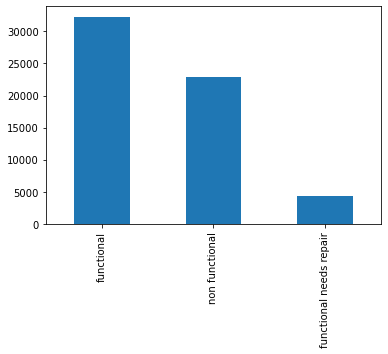

In [9]:
df['status_group'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# The percentage of "functional needs repair" is very low compared to the other two options. Since
# there are so few, I'm going to drop those values from the status_group column in order to solve the class
# imbalance problem
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [11]:
# Dropping "functional needs repair"
df = df[df.status_group != "functional needs repair"]

In [12]:
# Confirming the drop
df['status_group'].value_counts(normalize=True)

functional        0.585643
non functional    0.414357
Name: status_group, dtype: float64

# Scrub

# Explore

In [13]:
# For the first vanilla model, I'll use just the numerical columns from the dataset

In [14]:
# numerical columns
numerical_columns = df.select_dtypes("number")
numerical_columns

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [15]:
# Next step after trying the vanilla decision tree model and the random forest model, 
# use the models to decide on feature importance for the next categorical feature
# Based off the two models, the features that were most important were geographical, so
# my next categorical feature will be on that is geographical. In the dataset, there are a few
# that fit that description, "basin", "subvillage", "region", "lga", "ward". I'll take a look at
# the content of each column to make my decision for the next feature

In [64]:
# numerical columns
cat_columns = df.select_dtypes("object")
cat_columns

,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,3/14/2011,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,3/6/2013,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,2/25/2013,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,1/28/2013,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,7/13/2011,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,5/3/2013,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,functional,5/7/2011,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,functional,4/11/2011,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,functional,3/8/2011,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [69]:
df["num_private"].value_counts().nunique()

25

In [66]:
df["water_quality"].nunique()

8

In [58]:
df["basin"].value_counts().nunique()

9

In [57]:
df["subvillage"].value_counts().nunique()

91

In [56]:
df["region"].value_counts().nunique()

21

In [54]:
df["lga"].value_counts().nunique()

117

In [55]:
df["ward"].value_counts().nunique()

134

In [21]:
# Based of the number of unique values per column, my second categorical choice for a column
# will be "basin"

In [22]:
# Check for missing values
df["basin"].isnull().sum()

0

In [23]:
# add "basin" column
df_basin = pd.concat([numerical_columns, df['basin']], axis=1)
df_basin.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,Lake Nyasa
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,Lake Victoria
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,Pangani
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,Ruvuma / Southern Coast
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,Lake Victoria


In [24]:
# dummy code "basin"
df_basin_dummy = pd.get_dummies(df_basin, drop_first=True)

In [25]:
print('Shape before dummy coding: ', df_basin.shape)
print('Shape after dummy coding: ', df_basin_dummy.shape)

Shape before dummy coding:  (55083, 11)
Shape after dummy coding:  (55083, 18)


In [26]:
df_basin_dummy.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,1,0,0,0,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,0,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,0,0,0,0,1,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,0,0,0,0,0,0,1,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Based of the second iteration of models, it looks like there was slight improvement with the addition of the dummy "basin"
# column. Next step would be 

# Model

In [27]:
X = numerical_columns.drop("id", axis=1)
y = df["status_group"]

In [28]:
# First vanilla model with numerical columns- logistic regression

In [29]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [30]:
# Train the model using the training data
lg1 = LogisticRegression(random_state=11, max_iter=1000)
lg1.fit(X_train, y_train)

print(f"Training Score: {lg1.score(X_train, y_train)}")
print(f"Testing Score: {lg1.score(X_test, y_test)}")

Training Score: 0.5950392592928788
Testing Score: 0.5954434056458201


In [31]:
# First vanilla model with numerical columna - Decision tree

In [32]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [33]:
dt1 = DecisionTreeClassifier(max_depth=7)
dt1.fit(X_train, y_train)

print(f"Training Score: {dt1.score(X_train, y_train)}")
print(f"Testing Score: {dt1.score(X_test, y_test)}")

Training Score: 0.6928243997639904
Testing Score: 0.6911137333212308


In [34]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt1.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.271233
8,construction_year,0.187387
2,longitude,0.184152
3,latitude,0.139004
7,population,0.124773
5,region_code,0.044323
1,gps_height,0.035046
6,district_code,0.012982
4,num_private,0.001100


In [35]:
# First vanilla model with only numerical columns- random forest

In [36]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2, random_state=11)

In [37]:
# Fit random forest 

rf1 = RandomForestClassifier(max_depth = 5)
rf1.fit(X_train, y_train)


print(f'Training Score: {rf1.score(X_train, y_train)}')
print(f'Testing Score: {rf1.score(X_test, y_test)}')

Training Score: 0.6779376389960514
Testing Score: 0.6784060996641554


In [38]:
# View feature importance to help choose next categorical column
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf1.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.305498
8,construction_year,0.252228
2,longitude,0.095626
1,gps_height,0.090684
3,latitude,0.081678
5,region_code,0.079973
7,population,0.060658
6,district_code,0.029857
4,num_private,0.003798


# Second iteration of models with added categorical column, "basin"

In [40]:
# Add in the new X variable, df_basin_dummy
X = df_basin_dummy.drop("id", axis=1)

y = df["status_group"]

In [41]:
# fit second logistic regression

In [42]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [43]:
# train the model using the training data
lg2 = LogisticRegression(random_state=11, max_iter=1000)
lg2.fit(X_train, y_train)

print(f"Training Score: {lg2.score(X_train, y_train)}")
print(f"Testing Score: {lg2.score(X_test, y_test)}")

Training Score: 0.6093586892388689
Testing Score: 0.6084233457384043


In [44]:
# fit second decision tree

In [45]:
# perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [46]:
dt2 = DecisionTreeClassifier(max_depth=7)
dt2.fit(X_train, y_train)

print(f"Training Score: {dt2.score(X_train, y_train)}")
print(f"Testing Score: {dt2.score(X_test, y_test)}")

Training Score: 0.689919665955612
Testing Score: 0.6839429971861668


In [47]:
# fit second random forest

In [48]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [49]:
# fit random forest 

rf2 = RandomForestClassifier(max_depth = 5)
rf2.fit(X_train, y_train)

print(f'Training Score: {rf2.score(X_train, y_train)}')
print(f'Testing Score: {rf2.score(X_test, y_test)}')

Training Score: 0.6780964916261971
Testing Score: 0.6790414813470091


In [50]:
# Viewing feature importance of the model with the highest testing score - in this case, random forest

In [51]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf2.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.293139
8,construction_year,0.242838
1,gps_height,0.093018
2,longitude,0.090020
5,region_code,0.069694
3,latitude,0.065729
7,population,0.054234
6,district_code,0.035253
15,basin_Ruvuma / Southern Coast,0.024998
9,basin_Lake Nyasa,0.007438


In [52]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt2.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.272381
2,longitude,0.193987
8,construction_year,0.183317
7,population,0.129571
3,latitude,0.127530
1,gps_height,0.040016
5,region_code,0.025303
9,basin_Lake Nyasa,0.010101
6,district_code,0.009960
15,basin_Ruvuma / Southern Coast,0.006726


# Interpret